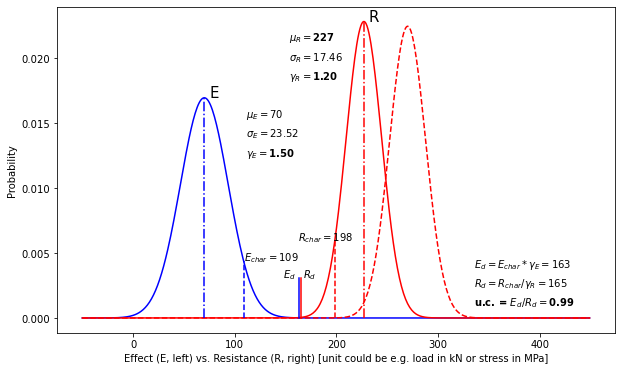

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
  

# define lower and upper values of Effect E and Resistance R
Elower=30
Eupper=111
E = np.arange(Elower,Eupper,1)
Rlower=198
Rupper=258
R = np.arange(Rlower,Rupper,1)
Rlower_old=240
Rupper_old=301
R_old = np.arange(Rlower_old,Rupper_old,1)

# define safety factors
gamma_R = 1.2
gamma_E = 1.5


# Plot x-axis range with 1 steps.
x_axis = np.arange(-50, 450, 1)

# figure size in inches
plt.figure(figsize=(10, 6))
  
# Calculating mean and standard deviation
meanE = statistics.mean(E)
sdE = statistics.stdev(E)
probE=(1/(sdE*math.sqrt(2*math.pi)))*math.exp(-((0)**2)/(2*sdE**2))
probErep=(1/(sdE*math.sqrt(2*math.pi)))*math.exp((-(1.64*sdE)**2)/(2*sdE**2))
plt.text(Eupper,probE-0.0015, "$\mu_E=$"+'{0:.0f}'.format(meanE), fontsize=10)
plt.text(Eupper,probE-0.003, "$\sigma_E=$"+'{0:.2f}'.format(sdE), fontsize=10)
plt.text(Eupper,probE-0.0045, "$\gamma_E=$"+'{0:.2f}'.format(gamma_E), fontsize=10, fontweight='bold')
Ed = (meanE+1.64*sdE)*gamma_E

meanR = statistics.mean(R)
sdR = statistics.stdev(R)
probR=(1/(sdR*math.sqrt(2*math.pi)))*math.exp(-((0)**2)/(2*sdR**2))
probRrep=(1/(sdR*math.sqrt(2*math.pi)))*math.exp((-(1.64*sdR)**2)/(2*sdR**2))
plt.text(Rlower-45,probR-0.0015, "$\mu_R=$"+'{0:.0f}'.format(meanR), fontsize=10, fontweight='bold')
plt.text(Rlower-45,probR-0.003, "$\sigma_R=$"+'{0:.2f}'.format(sdR), fontsize=10)
plt.text(Rlower-45,probR-0.0045, "$\gamma_R=$"+'{0:.2f}'.format(gamma_R), fontsize=10, fontweight='bold')
Rd = (meanR-1.64*sdR)/gamma_R

#also calculate the old R graph to show clearly how the curves has shifted to the left
meanR_old = statistics.mean(R_old)
sdR_old = statistics.stdev(R_old)
probR_old=(1/(sdR_old*math.sqrt(2*math.pi)))*math.exp(-((0)**2)/(2*sdR_old**2))
probRrep_old=(1/(sdR_old*math.sqrt(2*math.pi)))*math.exp((-(1.64*sdR_old)**2)/(2*sdR_old**2))

# plot Ed values
plt.text(Rupper*1.3,0.5*probR-0.0075, "$E_d = E_{char}*\gamma_E=$"+'{0:.0f}'.format(Ed), fontsize=10)
plt.text(Rupper*1.3,0.5*probR-0.0090, "$R_d = R_{char}/\gamma_R=$"+'{0:.0f}'.format(Rd), fontsize=10)
plt.text(Rupper*1.3,0.5*probR-0.0105, "u.c. = $E_d / R_d = $"+'{0:.2f}'.format(Ed/Rd), fontsize=10, fontweight='bold')

# plot normal distribution curves for E (blue) and R (red) and R_old (red-dashed)
plt.plot(x_axis, norm.pdf(x_axis, meanE, sdE),'b')
plt.plot(x_axis, norm.pdf(x_axis, meanR, sdR), 'r')
plt.plot(x_axis, norm.pdf(x_axis, meanR_old, sdR_old), 'r--')

plt.text(meanE+5, probE, 'E', fontsize=15)
plt.text(meanE+1.64*sdE, probErep, "$E_{char}=$"+'{0:.0f}'.format(meanE+1.64*sdE), fontsize=10)
plt.text(meanE+2.2*sdE*gamma_E, probErep*0.7, '$E_d$', fontsize=10)


# plot averages with dash-dotted red/blue lines
plt.plot([meanR,meanR],[0,probR], 'r-.')
plt.plot([meanE,meanE],[0,probE], 'b-.')

# plot 5%-characteristic value with dashed red/blue lines
plt.plot([meanR-1.64*sdR,meanR-1.64*sdR],[0,probRrep], 'r--')
plt.plot([meanE+1.64*sdE,meanE+1.64*sdE],[0,probErep], 'b--')

# plot dimensioning value with drawn red/blue lined
plt.plot([(meanR-1.64*sdR)/gamma_R,(meanR-1.64*sdR)/gamma_R],[0,0.7*probErep], 'r-')
plt.plot([(meanE+1.64*sdE)*gamma_E,(meanE+1.64*sdE)*gamma_E],[0,0.7*probErep], 'b-')

plt.text(meanR+5, probR, 'R', fontsize=15)
plt.text(meanR-3.7*sdR, probRrep, "$R_{char}=$"+'{0:.0f}'.format(meanR-1.64*sdR), fontsize=10)
plt.text(meanR-4.1*sdR/gamma_R, probErep*0.7, '$R_{d}$', fontsize=10)

plt.xlabel("Effect (E, left) vs. Resistance (R, right) [unit could be e.g. load in kN or stress in MPa]")
plt.ylabel("Probability")

plt.savefig("E_R_curves_highgamma_uc0.99_beta5.4.pdf", format="pdf", bbox_inches="tight")
plt.show()